https://github.com/ageitgey/face_recognition

Запустить ее у меня не получилось даже на colab, все еще проблемы при установке. 
Тут у них детекция лица + выравнивание, ключевые точки у них это линии на лице
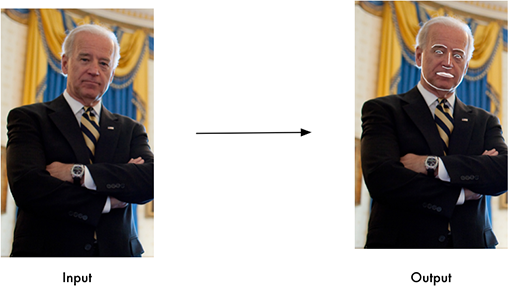
Можно использовать в консоли, можно как python библиотеку. 
Сравнивает тех людей которые находятся в папке с известными, со всеми которые в папке с неизвестными. Если есть совпадение, говорит, иначе говорит unknown_person. 
Можно настроить порог совпадения. 

В инструкции сказано что можно использовать несколько ядер процессора для обработки. Но у меня падали ошибки связанные с cuda. 

In [ ]:
# Установка pip3 install face_recognition
!pip3 install face_recognition
# Во время установки ошибка изза cmake. Хотя он у меня по идее установлен, и через cmake.org, и через choco. 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=706813d07024638f3e0209bfdf9271eb59ea5b0c6b4775668afa5dc24de139a9
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [2]:
import os

os.makedirs('known_people', exist_ok=True)
os.makedirs('unknown_people', exist_ok=True)

In [3]:
import requests

image_urls = [
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F8%2F8d%2FPresident_Barack_Obama.jpg&f=1&nofb=1&ipt=25ff73f662f19caf8ebce77344974b1378aef2e66b0721a9041af06fa9093b66",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstorage.googleapis.com%2Fafs-prod%2Fmedia%2Fae29b6889d264d04bd3afebbcdc7528a%2F3000.jpeg&f=1&nofb=1&ipt=cc803d36569db17970ebf541d58f51ca37bd7b2a55df00a27e31310c60b0673a"
]

for i, url in enumerate(image_urls):
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
    file_path = os.path.join('known_people', f'image_{i+1}.jpg')
    with open(file_path, 'wb') as out_file:
      out_file.write(response.content)
    print(f"Downloaded {url} to {file_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading {url}: {e}")

# Verify the downloaded files
!ls known_people

Downloaded https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F8%2F8d%2FPresident_Barack_Obama.jpg&f=1&nofb=1&ipt=25ff73f662f19caf8ebce77344974b1378aef2e66b0721a9041af06fa9093b66 to known_people/image_1.jpg
Downloaded https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstorage.googleapis.com%2Fafs-prod%2Fmedia%2Fae29b6889d264d04bd3afebbcdc7528a%2F3000.jpeg&f=1&nofb=1&ipt=cc803d36569db17970ebf541d58f51ca37bd7b2a55df00a27e31310c60b0673a to known_people/image_2.jpg
image_1.jpg  image_2.jpg


In [4]:

unknown_image_urls = [
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallpapers.com%2Fimages%2Fhd%2Fbarack-obama-smiling-president-94uy9qv6fravr4e4.jpg&f=1&nofb=1&ipt=e21822ea76fb73e673cffbe004bd51e05c5741e0b1b35a012a9918d750216be1",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthespun.com%2F.image%2Ft_share%2FMTk0NjA4MTE1ODU1OTI2NjgwOA%2Fbarack-obama-speaks-at-his-foundations-democracy-forum-in-new-york-city.jpg&f=1&nofb=1&ipt=661ed3d5bcd112b9cdfd0289e4993593cd9af4147f1f23678acb91ba09ef992a",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.courthousenews.com%2Fwp-content%2Fuploads%2F2020%2F04%2FVirus.Putin_.jpg&f=1&nofb=1&ipt=bc36f1750de8fd8776189595d89b3f1462e4d7fd2b86594f9389a0845591de7",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstatic01.nyt.com%2Fimages%2F2022%2F09%2F21%2Fmultimedia%2F00putin-speeches-topart%2F00putin-speeches-topart-superJumbo.jpg%3Fquality%3D75%26auto%3Dwebp&f=1&nofb=1&ipt=7968e38d78e81bda121dca69173ec2d5589432bd7c7c1617ccff3166e6b2cb66",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdynaimage.cdn.cnn.com%2Fcnn%2Fdigital-images%2Forg%2F2200b2eb-538f-464c-8cca-2c44a8738e90.jpg&f=1&nofb=1&ipt=ca5d734539f435aa5263b8edb33aec9fce7e183bb8a20439eb2c59be9b9e8f73",
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.cnn.com%2Fapi%2Fv1%2Fimages%2Fstellar%2Fprod%2F230816091017-03-joe-biden-081523.jpg%3Fc%3D16x9%26q%3Dh_720%2Cw_1280%2Cc_fill&f=1&nofb=1&ipt=aaf030bc1212772c0a8f42ddba29ee95911fcfc56e9c7d3f4aac989977310f5b"
]

for i, url in enumerate(unknown_image_urls):
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
    file_path = os.path.join('unknown_people', f'unknown_image_{i+1}.jpg')
    with open(file_path, 'wb') as out_file:
      out_file.write(response.content)
    print(f"Downloaded {url} to {file_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading {url}: {e}")

!ls unknown_people

Downloaded https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallpapers.com%2Fimages%2Fhd%2Fbarack-obama-smiling-president-94uy9qv6fravr4e4.jpg&f=1&nofb=1&ipt=e21822ea76fb73e673cffbe004bd51e05c5741e0b1b35a012a9918d750216be1 to unknown_people/unknown_image_1.jpg
Error downloading https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthespun.com%2F.image%2Ft_share%2FMTk0NjA4MTE1ODU1OTI2NjgwOA%2Fbarack-obama-speaks-at-his-foundations-democracy-forum-in-new-york-city.jpg&f=1&nofb=1&ipt=661ed3d5bcd112b9cdfd0289e4993593cd9af4147f1f23678acb91ba09ef992a: 400 Client Error: Bad Request for url: https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthespun.com%2F.image%2Ft_share%2FMTk0NjA4MTE1ODU1OTI2NjgwOA%2Fbarack-obama-speaks-at-his-foundations-democracy-forum-in-new-york-city.jpg&f=1&nofb=1&ipt=661ed3d5bcd112b9cdfd0289e4993593cd9af4147f1f23678acb91ba09ef992a
Downloaded https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.courthousenews.com%2Fwp-content%2Fuploa

In [7]:
!face_recognition --help

Usage: face_recognition [OPTIONS] KNOWN_PEOPLE_FOLDER IMAGE_TO_CHECK

Options:
  --cpus INTEGER           number of CPU cores to use in parallel (can speed
                           up processing lots of images). -1 means "use all in
                           system"
  --tolerance FLOAT        Tolerance for face comparisons. Default is 0.6.
                           Lower this if you get multiple matches for the same
                           person.
  --show-distance BOOLEAN  Output face distance. Useful for tweaking tolerance
                           setting.
  --help                   Show this message and exit.


In [8]:
!face_recognition ./known_people/ ./unknown_people/

Traceback (most recent call last):
  File "/usr/local/bin/face_recognition", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1442, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1363, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1226, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 794, in invoke
    return callback(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/face_recognition/face_recognition_cli.py", line 102, in main
    known_names, known_face_encodings = scan_known_people(known_people_folder)
                               

In [12]:
import face_recognition
known_image = face_recognition.load_image_file("known_people/image_1.jpg")
unknown_image = face_recognition.load_image_file("unknown_people/unknown_image_1.jpg")

biden_encoding = face_recognition.face_encodings(known_image)
unknown_encoding = face_recognition.face_encodings(unknown_image)

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)

RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpRD4zKh/sdists-v9/pypi/dlib/19.24.6/gpdsDwpeWdAxkg7usmZyi/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.